In [522]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [523]:
data = pd.read_csv('bureau.csv')
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [524]:
data.shape

(1716428, 17)

In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


# Understanding of variables

CREDIT_ACTIVE - Current status of a Loan - Closed/ Active (2 values)

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT - Number of days ELAPSED since customer applied for CB credit with respect to current application Interpretation - Are these loans evenly spaced time intervals? Are they concentrated within a same time frame?

DAYS_CREDIT_ENDDATE - Number of days the customer CREDIT is valid at the time of application 

CREDIT_DAY_OVERDUE - Number of days the customer CREDIT is past the end date at the time of application

AMT_CREDIT_SUM - Total available credit for a customer 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed 

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized 

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue 

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

# NOTE:
For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'

AMT_ANNUITY - Annuity of the Credit Bureau data 

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received 

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application 

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

In [526]:
data.duplicated().sum()

0

In [527]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08


<ipython-input-528-0f017e91119c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_df_corr, dtype=np.bool)


<AxesSubplot:>

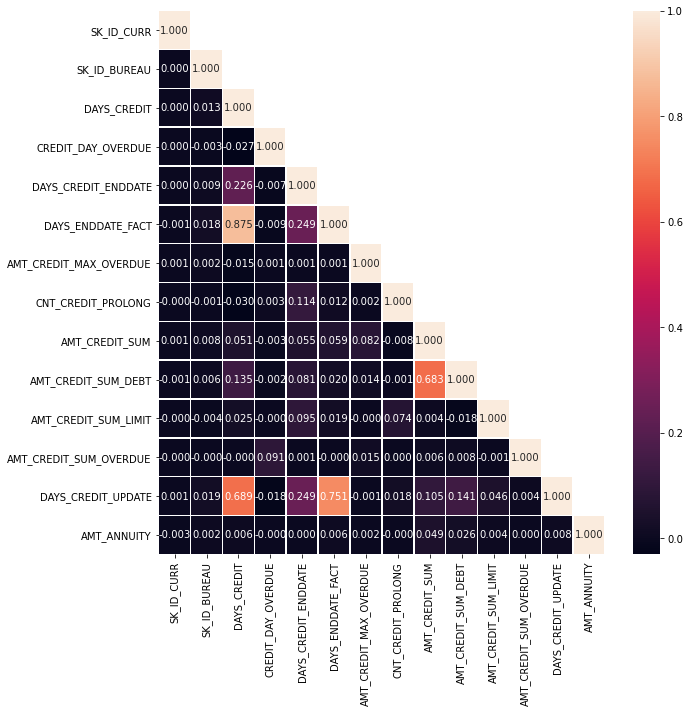

In [528]:
numeric_df = data._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [529]:
data.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

In [530]:
data.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [531]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [532]:
missing_data(data)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


### DROP AMT_ANNUITY columns do là phần trăm >60% cùng với đó ANNUITY là trái phiếu đồng niên k liên quan gì đến các khoản tín dụng/nợ

In [533]:
data = data.drop(columns=['AMT_ANNUITY'])
data.shape

(1716428, 16)

In [534]:
data['DAYS_ENDDATE_FACT'].fillna(value = data['DAYS_ENDDATE_FACT'].mean(), inplace= True)
# data['DAYS_CREDIT_ENDDATE'].fillna(value=data['DAYS_CREDIT_ENDDATE'].mean(), inplace = True)

data['AMT_CREDIT_SUM_DEBT']=data['AMT_CREDIT_SUM_DEBT'].fillna(0)
data['AMT_CREDIT_SUM']=data['AMT_CREDIT_SUM'].fillna(0)

In [535]:
missing_data(data)

,Total,Percent
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM_LIMIT,591780,34.477415
DAYS_CREDIT_ENDDATE,105553,6.149573
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_ENDDATE_FACT,0,0.000000


# $\color{red}{\text{EDA}}$



# $\color{red}{\text{Các biến catergories}}$ 

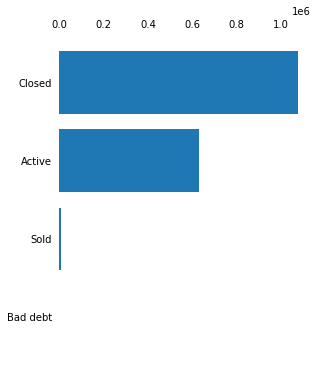

In [536]:
grp_credit_active = data['CREDIT_ACTIVE'].value_counts().reset_index()
grp_credit_active.columns = ['status', 'amt']
# grp_credit_active

fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_active.status, grp_credit_active.amt,height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

### Trạng thái của các khoản tín dụng Bureau là 62.9% là Closed, 36.7% là Active, 0.4% là đã được bán, <0.1% là nợ xấu 

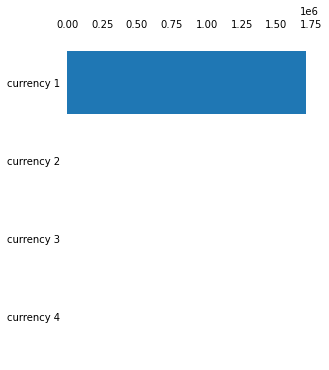

In [537]:
grp_credit_currency = data['CREDIT_CURRENCY'].value_counts().reset_index()
grp_credit_currency.columns = ['type_of_currency', 'amt']
# grp_credit_currency

fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_currency.type_of_currency, grp_credit_currency.amt,height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

### Trong 4 loại tiền tệ, từ currency 1 đến currency 4 thì 99.9%  là loại 1 

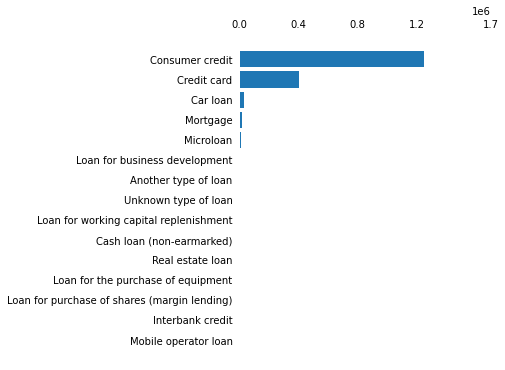

In [538]:
grp_credit_type = data['CREDIT_TYPE'].value_counts().reset_index()
grp_credit_type.columns = ['type_of_credit', 'amt']
# grp_credit_type

fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_type.type_of_credit, grp_credit_type.amt, height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.set_xticks([0,400000,800000,1200000,1700000])
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

### Có tổng cộng 15 loại tín dụng, 72.9% là tín dụng tiêu dùng, 23.4% là thẻ tín dụng 

### PROFILE REPORT 

In [539]:
# report = ProfileReport(data[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']], minimal=True)
# report.to_notebook_iframe()
# report.to_file("report.html", silent=False)

### MERGE with TARGET columns in application_train.csv to get more insights 

In [540]:
app_train = pd.read_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [541]:
data_merged = pd.merge(app_train[["SK_ID_CURR", "TARGET"]], data, how='left', on=['SK_ID_CURR'])
data_merged.head(10)

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100002,1,6158904.0,Closed,currency 1,-1125.0,0.0,-1038.0,-1038.000000,NaN,0.0,40761.000,0.0,NaN,0.0,Credit card,-1038.0
1,100002,1,6158905.0,Closed,currency 1,-476.0,0.0,NaN,-48.000000,NaN,0.0,0.000,0.0,NaN,0.0,Credit card,-47.0
2,100002,1,6158906.0,Closed,currency 1,-1437.0,0.0,-1072.0,-1185.000000,0.000,0.0,135000.000,0.0,0.000,0.0,Consumer credit,-1185.0
3,100002,1,6158907.0,Closed,currency 1,-1121.0,0.0,-911.0,-911.000000,3321.000,0.0,19071.000,0.0,NaN,0.0,Consumer credit,-906.0
4,100002,1,6158908.0,Closed,currency 1,-645.0,0.0,85.0,-36.000000,5043.645,0.0,120735.000,0.0,0.000,0.0,Consumer credit,-34.0
5,100002,1,6158909.0,Active,currency 1,-103.0,0.0,NaN,-1017.437148,40.500,0.0,31988.565,0.0,31988.565,0.0,Credit card,-24.0
6,100002,1,6158903.0,Active,currency 1,-1042.0,0.0,780.0,-1017.437148,NaN,0.0,450000.000,245781.0,0.000,0.0,Consumer credit,-7.0
7,100002,1,6113835.0,Closed,currency 1,-1043.0,0.0,62.0,-967.000000,0.000,0.0,67500.000,0.0,NaN,0.0,Credit card,-758.0
8,100003,0,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.000000,0.000,0.0,22248.000,0.0,0.000,0.0,Consumer credit,-2131.0
9,100003,0,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.000000,0.000,0.0,112500.000,0.0,0.000,0.0,Credit card,-540.0


In [542]:
data_merged.shape

(1509345, 17)

# $\color{red}{\text{Các biến Numerical}}$

In [543]:
def draw_distribution_dist(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


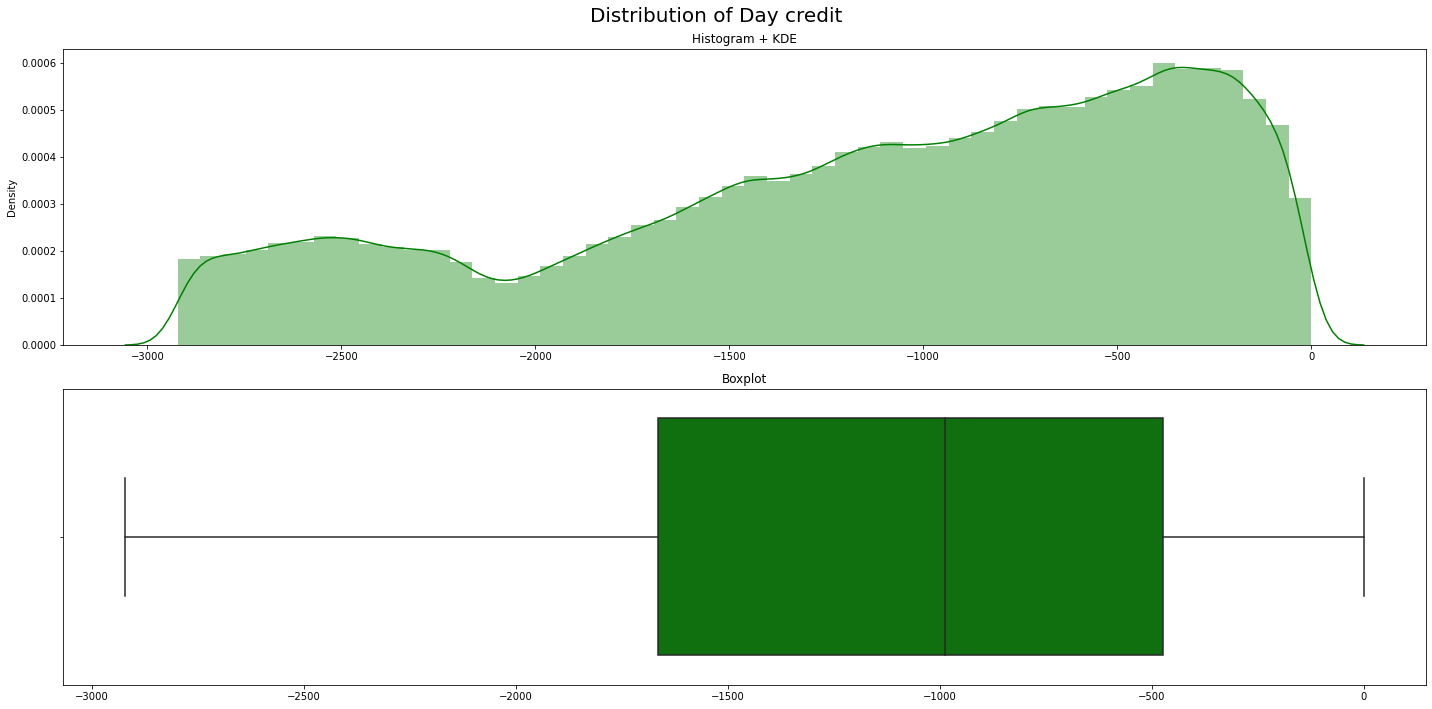

In [544]:
draw_distribution_dist(data["DAYS_CREDIT"],'Distribution of Day credit',"g")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


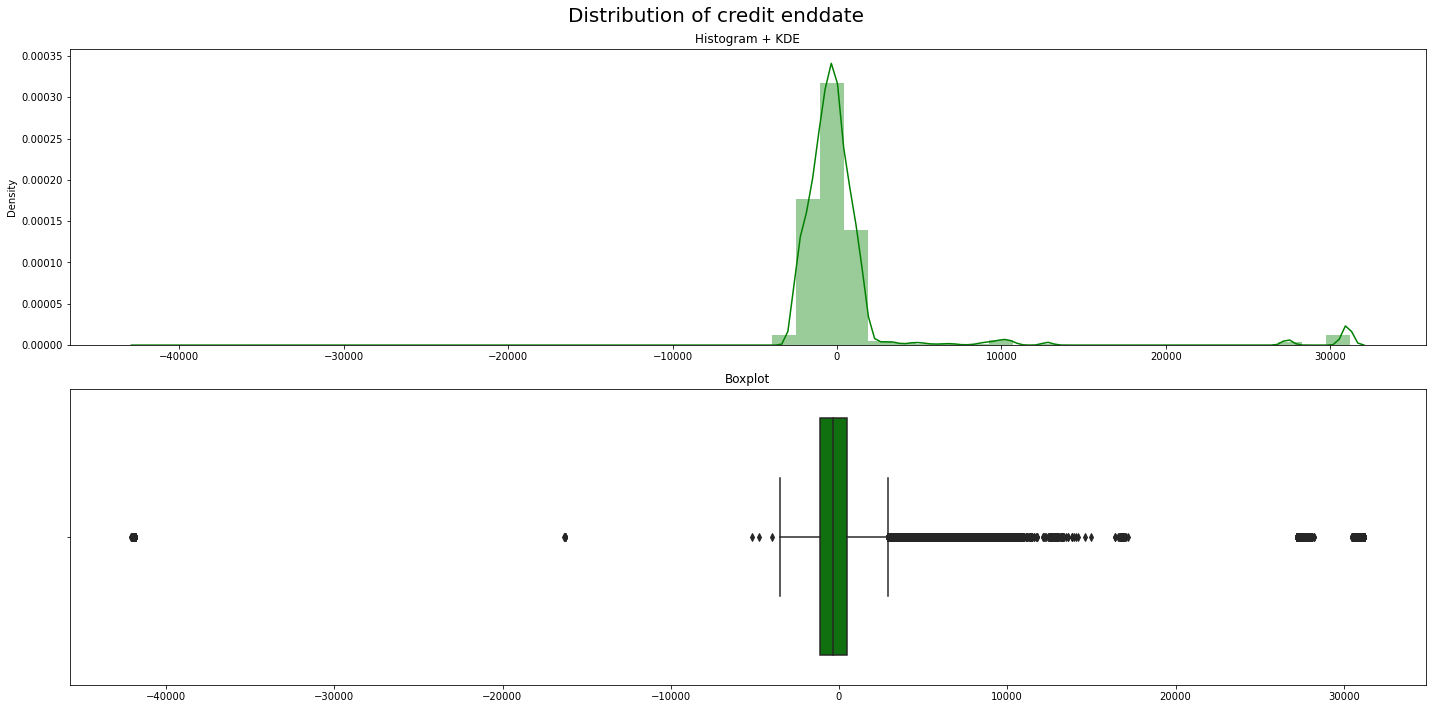

In [545]:
draw_distribution_dist(data["DAYS_CREDIT_ENDDATE"],'Distribution of credit enddate',"g")

# $\color{red}{\text{Number of past loans per customer}}$

In [546]:
grp_test = data_merged[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
grp_test.columns = ['SK_ID_CURR','target','num_of_past_loans']
grp_test

,SK_ID_CURR,target,num_of_past_loans
0,100002,1,8
1,100003,0,4
2,100004,0,2
3,100006,0,0
4,100007,0,1
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,4
307509,456254,1,1


[Text(0.5, 1.0, 'defaulter')]

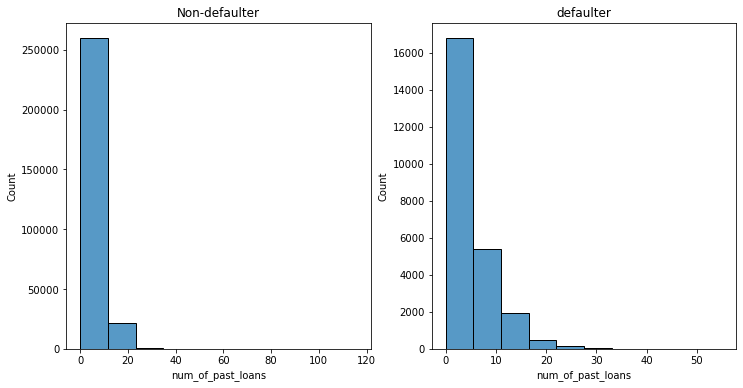

In [547]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(grp_test[grp_test["target"] == 0]["num_of_past_loans"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(grp_test[grp_test["target"] == 1]["num_of_past_loans"], ax= ax[1], bins=10).set(title = "defaulter")

### Những người gặp khó khăn trong việc trả nợ là do có số lượng các khoản tín dụng nhiều 

In [548]:
# grp = data[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
# grp.columns = ['SK_ID_CURR','num_of_past_loans']
# grp

In [549]:
# plt.figure(figsize=(8,6))
# sns.distplot(grp.num_of_past_loans)
# plt.show()



# $\color{red}{\text{Number of types of past loans per customer}}$

In [550]:
grp_num_of_type = data_merged[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
grp_num_of_type.columns = ['SK_ID_CURR','target','num_of_credit_type']
grp_num_of_type

,SK_ID_CURR,target,num_of_credit_type
0,100002,1,2
1,100003,0,2
2,100004,0,1
3,100006,0,0
4,100007,0,1
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,2
307509,456254,1,1


### VÍ DỤ:  Trong 8 cái past loan của 100002 thì sẽ có 2 loại 



[Text(0.5, 1.0, 'defaulter')]

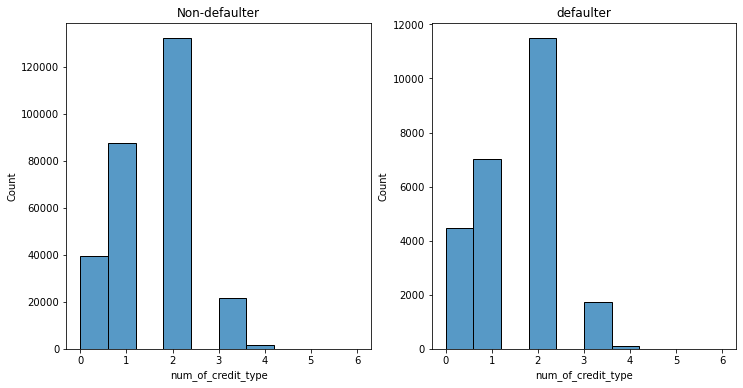

In [551]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(grp_num_of_type[grp_num_of_type["target"] == 0]["num_of_credit_type"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(grp_num_of_type[grp_num_of_type["target"] == 1]["num_of_credit_type"], ax= ax[1], bins=10).set(title = "defaulter")

### Phân bố khá giống nhau, có vẻ yếu tố number of credit type không ảnh hưởng đến việc khách hàng có gặp khó khăn trong việc trả nợ hay không 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


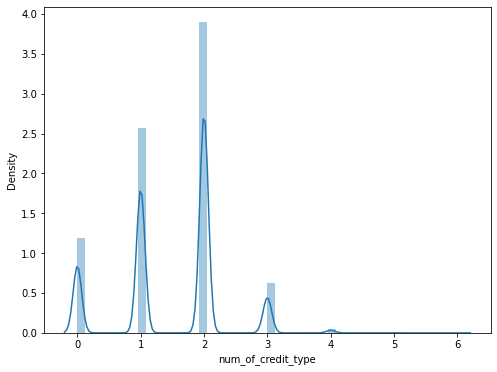

In [552]:
plt.figure(figsize=(8,6))
sns.distplot(grp_num_of_type.num_of_credit_type)
plt.show()

### Nhìn chung phần lớn khách hàng sẽ có 2 loại loans trc khi apply for credit bureau credit 

# $\color{red}{\text{The percentage of active loans per customer }}$

In [553]:
data_merged['CREDIT_ACTIVE_BINARY'] = data_merged['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data_merged['CREDIT_ACTIVE_BINARY'] = data_merged.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

grp_atv_loans = data_merged.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
grp_atv_loans

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,100002,1,0.250000
1,100003,0,0.250000
2,100004,0,0.000000
3,100006,0,1.000000
4,100007,0,0.000000
...,...,...,...
307506,456251,0,1.000000
307507,456252,0,1.000000
307508,456253,0,0.500000
307509,456254,1,0.000000


[Text(0.5, 1.0, 'Defaulter')]

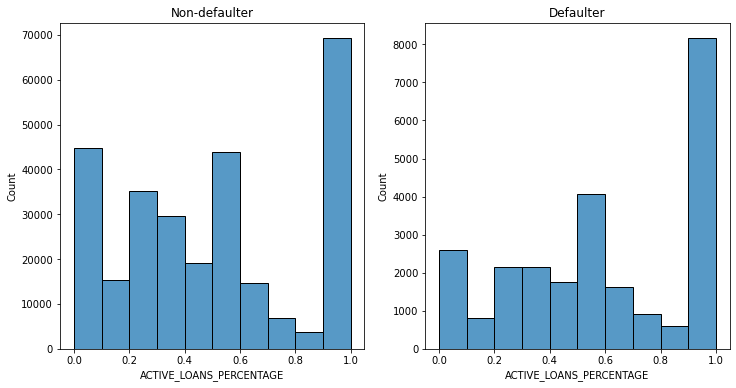

In [554]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(grp_atv_loans[grp_atv_loans["TARGET"] == 0]["ACTIVE_LOANS_PERCENTAGE"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(grp_atv_loans[grp_atv_loans["TARGET"] == 1]["ACTIVE_LOANS_PERCENTAGE"], ax= ax[1], bins=10).set(title = "Defaulter")

### Khác nhau ở mức 20-50%


<Figure size 576x432 with 0 Axes>

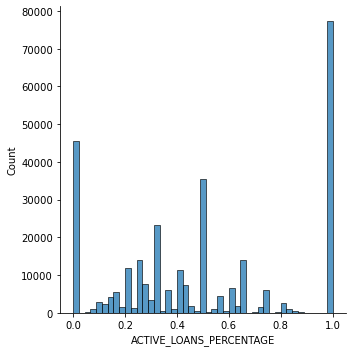

In [555]:
plt.figure(figsize=(8,6))
sns.displot(grp_atv_loans.ACTIVE_LOANS_PERCENTAGE)
plt.show()

### Ví dụ thằng 100002 có 8 cái past loan và trong đó có 2 cái active

### => active loan percentage của 100002 sẽ ~ 0.25

### Phân bố chủ yếu sẽ là 0%, 0.5%, 1%

# $\color{red}{\text{The percentage of loans per customer where end date for credit is past}}$

INTERPRETING CREDIT_DAYS_ENDDATE

NEGATIVE VALUE - Credit date was in the past at time of application( Potential Red Flag !!! )

POSITIVE VALUE - Credit date is in the future at time of application ( Potential Good Sign !!!!)

NOTE : This is not the same as % of Active loans since Active loans

can have Negative and Positive values for DAYS_CREDIT_ENDDATE

In [556]:
data_merged['CREDIT_ENDDATE_BINARY'] = data_merged['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1   
    return y

data_merged['CREDIT_ENDDATE_BINARY'] = data_merged.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)

grp_enddate = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
grp_enddate

,SK_ID_CURR,TARGET,CREDIT_ENDDATE_PERCENTAGE
0,100002,1,0.625000
1,100003,0,0.250000
2,100004,0,0.000000
3,100006,0,1.000000
4,100007,0,0.000000
...,...,...,...
307506,456251,0,1.000000
307507,456252,0,1.000000
307508,456253,0,0.500000
307509,456254,1,0.000000


[Text(0.5, 1.0, 'Defaulter')]

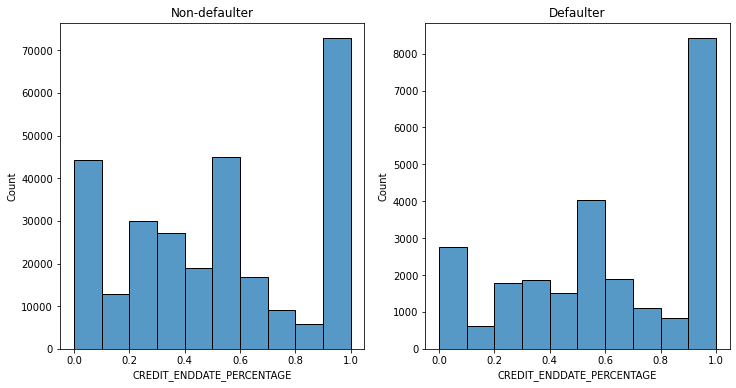

In [557]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(grp_enddate[grp_enddate["TARGET"] == 0]["CREDIT_ENDDATE_PERCENTAGE"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(grp_enddate[grp_enddate["TARGET"] == 1]["CREDIT_ENDDATE_PERCENTAGE"], ax= ax[1], bins=10).set(title = "Defaulter")

### 62.5% các khoản vay của th 100002 kết thúc trong tương lai sau khi có 1 cái application ở Home Credit

### => khach hang 100002 có 1 cái potential good sign, vì sau khi có khoản loan ở home credit rồi vẫn trả được cái khoản cũ 

<Figure size 576x432 with 0 Axes>

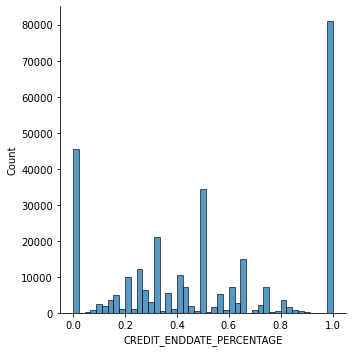

In [559]:
plt.figure(figsize=(8,6))
sns.displot(grp_enddate.CREDIT_ENDDATE_PERCENTAGE)
plt.show()

### Phân bố chủ yếu sẽ là 0%, 0.5%, 1%

# $\color{red}{\text{The Ratio of Total Debt to Total Credit for each Customer}}$

In [560]:
data_with_sum_debt_pos_sign = data_merged[data_merged['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data_merged[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data_merged = data_merged.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data_merged = data_merged.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data_merged['DEBT_CREDIT_RATIO'] = (data_merged['TOTAL_CUSTOMER_DEBT']/data_merged['TOTAL_CUSTOMER_CREDIT'])*100
data_merged['DEBT_CREDIT_RATIO'] = data_merged['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data_merged['TOTAL_CUSTOMER_DEBT'], data_merged['TOTAL_CUSTOMER_CREDIT']

grp = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
grp

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,100002,1,28.412163
1,100003,0,NaN
2,100004,0,NaN
3,100006,0,NaN
4,100007,0,NaN
...,...,...,...
307506,456251,0,NaN
307507,456252,0,NaN
307508,456253,0,45.349318
307509,456254,1,NaN


[Text(0.5, 1.0, 'Defaulter')]

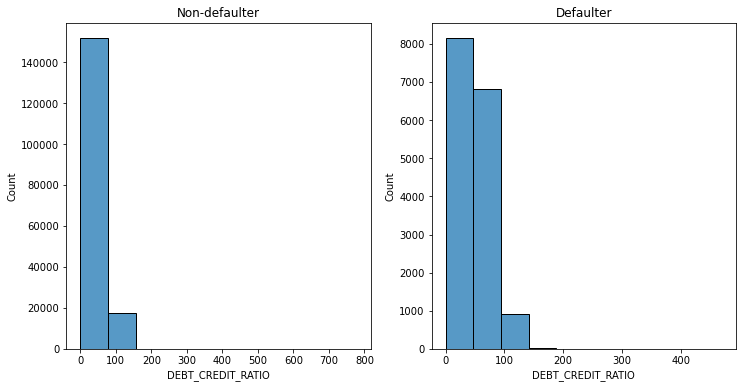

In [561]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(grp[grp["TARGET"] == 0]["DEBT_CREDIT_RATIO"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(grp[grp["TARGET"] == 1]["DEBT_CREDIT_RATIO"], ax= ax[1], bins=10).set(title = "Defaulter")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


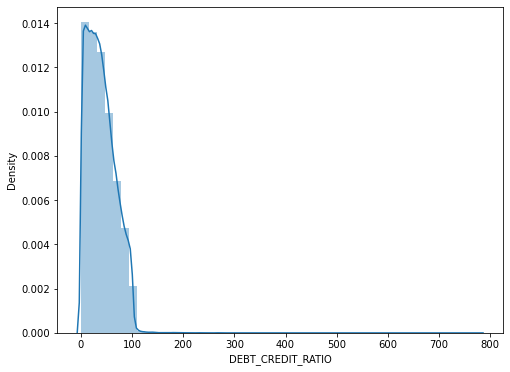

In [562]:
plt.figure(figsize=(8,6))
sns.distplot(grp.DEBT_CREDIT_RATIO)
plt.show()

### A High value may be a red flag indicative of potential default



# $\color{red}{\text{AVERAGE NUMBER OF LOANS PROLONGED}}$

In [563]:
grp = data[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']].groupby(by = ['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index().rename( index = str, columns = { 'CNT_CREDIT_PROLONG': 'AVG_CREDITDAYS_PROLONGED'})
grp

,SK_ID_CURR,AVG_CREDITDAYS_PROLONGED
0,100001,0.000000
1,100002,0.000000
2,100003,0.000000
3,100004,0.000000
4,100005,0.000000
...,...,...
305806,456249,0.000000
305807,456250,0.000000
305808,456253,0.000000
305809,456254,0.000000


<Figure size 576x432 with 0 Axes>

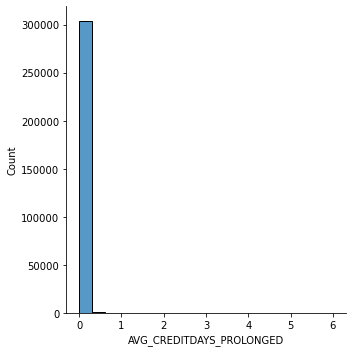

In [564]:
plt.figure(figsize=(8,6))
sns.displot(grp.AVG_CREDITDAYS_PROLONGED)
plt.show()